In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np



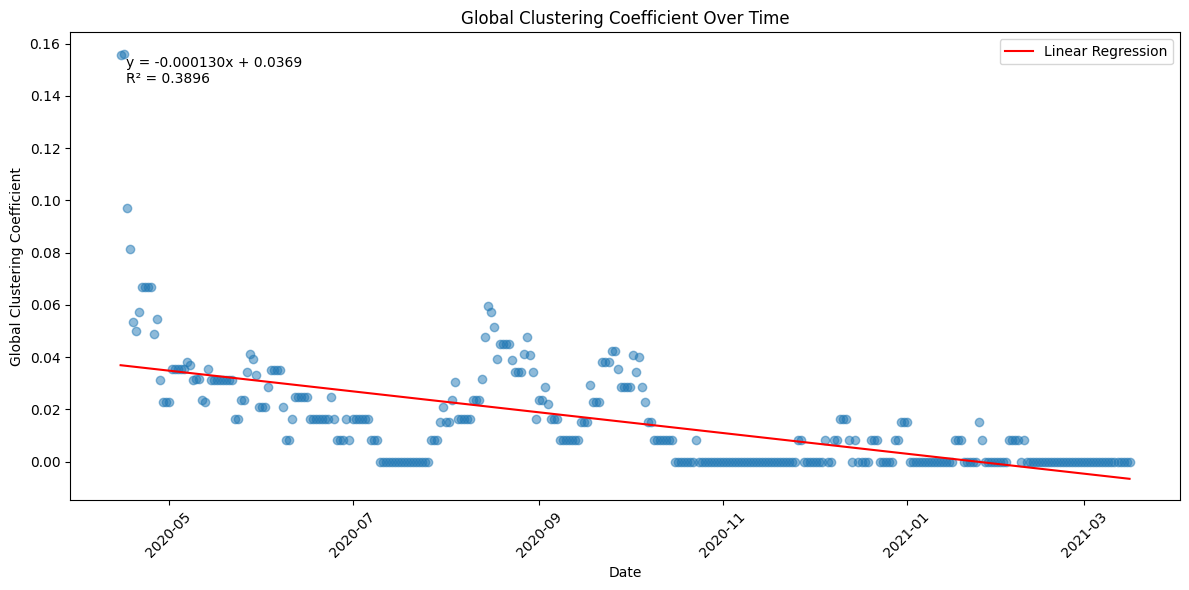

In [14]:
# Read the CSV file
df = pd.read_csv('../netstats/processed/d_corr-netstats-threshold-0.6.csv', parse_dates=['date'])

# Convert date to numeric (days since the first date)
df['date'] = pd.to_datetime(df['date'])
df['days'] = (df['date'] - df['date'].min()).dt.days

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(df['days'], df['global_cc'])

# Create the plot
plt.figure(figsize=(12, 6))
plt.scatter(df['date'], df['global_cc'], alpha=0.5)
plt.plot(df['date'], intercept + slope * df['days'], color='red', label='Linear Regression')

# Customize the plot
plt.title('Global Clustering Coefficient Over Time')
plt.xlabel('Date')
plt.ylabel('Global Clustering Coefficient')
plt.legend()

# Add text with regression details
text = f'y = {slope:.6f}x + {intercept:.4f}\nR² = {r_value**2:.4f}'
plt.text(0.05, 0.95, text, transform=plt.gca().transAxes, verticalalignment='top')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout and display the plot
plt.tight_layout()


    
plt.savefig("../../graphs/global_cc_regression_MSV_0.6.png", bbox_inches='tight')
plt.savefig("../../graphs/global_cc_regression_MSV_0.6.pdf", bbox_inches='tight')

plt.show()

# Print additional statistics

